/opt/homebrew/anaconda3/envs/robo_paper_foundations/lib/python3.11/site-packages/transformers/models/convnext/feature_extraction_convnext.py:30: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


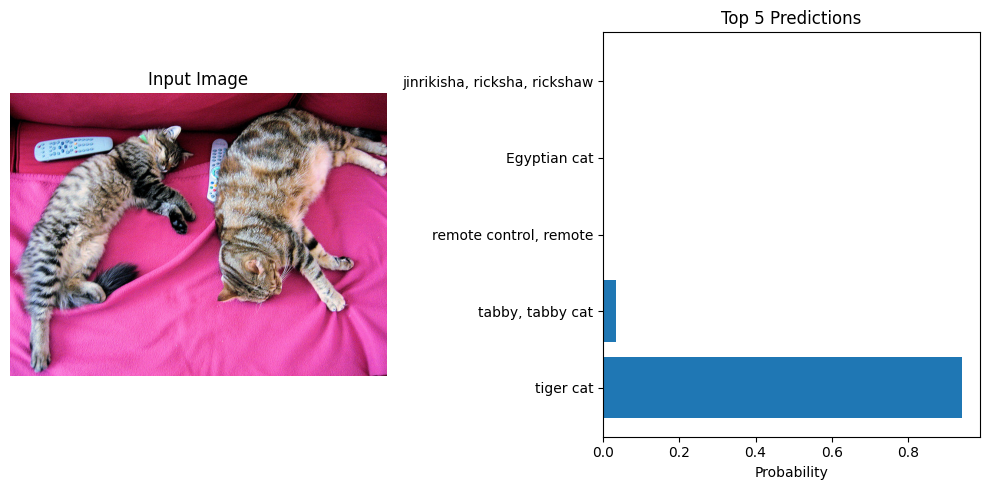

Top prediction: tiger cat (94.16% confidence)


In [6]:
from transformers import AutoFeatureExtractor, ResNetForImageClassification
import torch
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')

inputs = feature_extractor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# Get top 5 predictions
top_k = 5
probs = torch.nn.functional.softmax(logits, dim=-1)
top_probs, top_indices = torch.topk(probs, top_k)

# Convert to lists
top_probs = top_probs.squeeze().tolist()
top_indices = top_indices.squeeze().tolist()

# Get class names
class_names = [model.config.id2label[idx] for idx in top_indices]

# Display top predictions
plt.subplot(1, 2, 2)
y_pos = np.arange(len(class_names))
plt.barh(y_pos, top_probs, align='center')
plt.yticks(y_pos, class_names)
plt.xlabel('Probability')
plt.title('Top 5 Predictions')

plt.tight_layout()
plt.show()

# Print the top prediction
predicted_label = logits.argmax(-1).item()
print(f"Top prediction: {model.config.id2label[predicted_label]} ({top_probs[0]:.2%} confidence)")